In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pds
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid,simps,quad
from scipy.constants import c,h,e,pi,Boltzmann

In [16]:
df = pds.read_csv(r"C:\Users\Aditya Singh\OneDrive\Desktop\lambdaabsorption.txt", sep="\t")
df.head()
x = df["lambda"].values
y = df["absorption"].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)

In [17]:
file =(r"D:\cod ww2\astmg173.xls")
am15 = pds.read_excel(file)
am15.head()

#am15["Global tilt  W*m-2*nm-1"] = am15["Global tilt  W*m-2*nm-1"]*(10**9)
#am15["wavelenght"] = am15["wavelenght"]*(10**-9)

,wavelenght,Global tilt W*m-2*nm-1
0,280.0,4.730900e-23
1,280.5,1.230700e-21
2,281.0,5.689500e-21
3,281.5,1.566200e-19
4,282.0,1.194600e-18


In [18]:
regressor = RandomForestRegressor(n_estimators =56, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train)
y_pred = regressor.predict(X_test.reshape(-1,1))
y_full = regressor.predict(x.reshape(-1,1))

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  967.75


In [19]:
wave = np.array([226.5 , 361.05 , 404.41 , 589 , 632.8 , 1013.98 ])
def refractive_index (wavelength):
    return ( 1.31885 +  5173.8657/np.power(wavelength,2) +( -2.56817*10**8)/np.power(wavelength,4) +9.43261/np.power(wavelength,6))
print (refractive_index(226.5))

1.322122876382829


In [20]:
file =(r"C:\Users\Aditya Singh\OneDrive\Documents\Book2.xlsx")
newData = pds.read_excel(file ,header=1)
newData.head()
newData["Wavelength (nm)"] = newData["Wavelength (nm)"]*1000
newData

,Wavelength (nm),Wavenumber (cm),Frequency (THz),n,k,coeff (cm)
0,200.0,5.00×104,1.50×103,1.396,1.1×10−7,0.069
1,225.0,4.44×104,1.33×103,1.373,4.9×10−8,0.027
2,250.0,4.00×104,1.20×103,1.362,3.35×10−8,0.0168
3,275.0,3.64×104,1.09×103,1.354,2.35×10−8,0.0107
4,300.0,3.33×104,999,1.349,1.6×10−8,6.7×10−3
...,...,...,...,...,...,...
89,6600.0,1520,45.4,1.334,0.0356,680
90,6700.0,1490,44.7,1.329,0.0337,630
91,6800.0,1470,44.1,1.324,0.0327,600
92,6900.0,1450,43.4,1.321,0.0322,590


Text(0, 0.5, 'Refractive index')

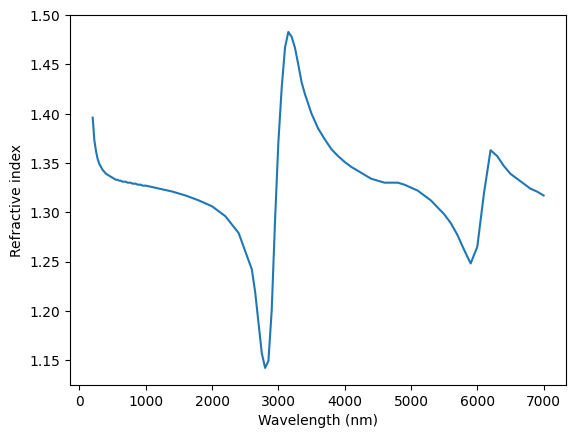

In [21]:
plt.plot(newData["Wavelength (nm)"],newData["n"])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive index')


RMSE:  0.012


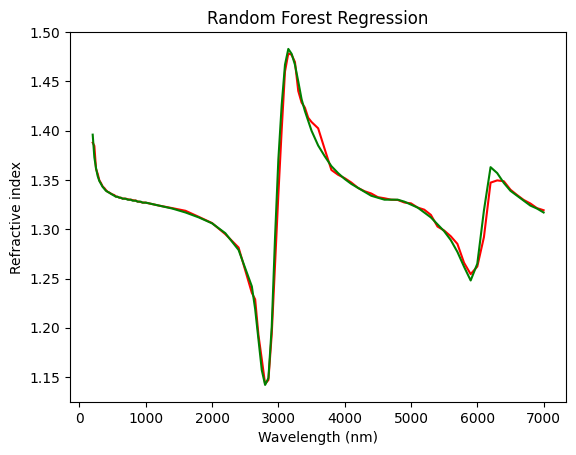

In [22]:
x1 = newData["Wavelength (nm)"].values
y1 = newData["n"].values.ravel()
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.05)
regressor1 = RandomForestRegressor(n_estimators =7, random_state = 0)
regressor1.fit(X_train1.reshape(-1,1), y_train1)
y_pred1 = regressor1.predict(X_test1.reshape(-1,1))
y_full1 = regressor1.predict(x1.reshape(-1,1))

# RMSE (Root Mean Square Error)
rmse1 = float(format(np.sqrt(mean_squared_error(y_test1, y_pred1)), '.3f'))
print("\nRMSE: ", rmse1)
X_grid = np.arange(min(x1), max(x1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(x1, y_full1, color = 'red')
plt.plot(x1, y1, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Refractive index')
plt.show()

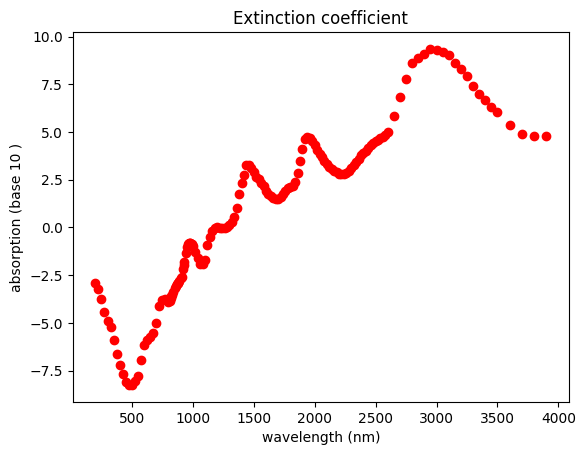

In [23]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, np.log(y_full), color = 'red')
#plt.scatter(x, y, color = 'green')
plt.title('Extinction coefficient')
plt.xlabel('wavelength (nm)')
plt.ylabel('absorption (base 10 )')
plt.show()

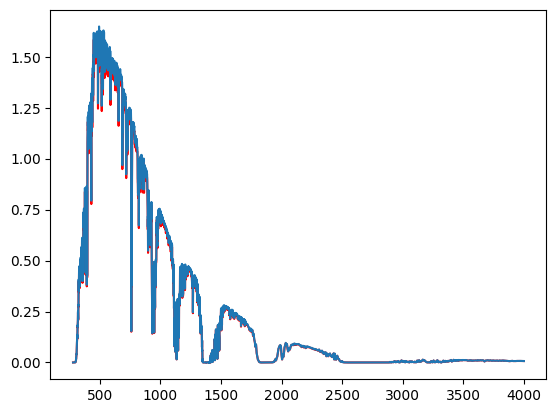

980.3340814125462

In [24]:
customSpect = pds.DataFrame()
customSpect["wavelenght"] = am15["wavelenght"]
am15["n"] = regressor1.predict(am15["wavelenght"].values.reshape(-1,1))
customSpect["trasmitted"] =  4*(am15["n"] )/np.power((1+am15["n"]),2) * am15["Global tilt  W*m-2*nm-1"]
plt.plot(customSpect["wavelenght"], customSpect["trasmitted"],color = "red")
plt.plot(am15["wavelenght"], am15["Global tilt  W*m-2*nm-1"])
integral = cumulative_trapezoid(customSpect["trasmitted"],customSpect["wavelenght"],initial=0)
#plt.plot(am15["wavelenght"],integral)
plt.show()
integral[-1]


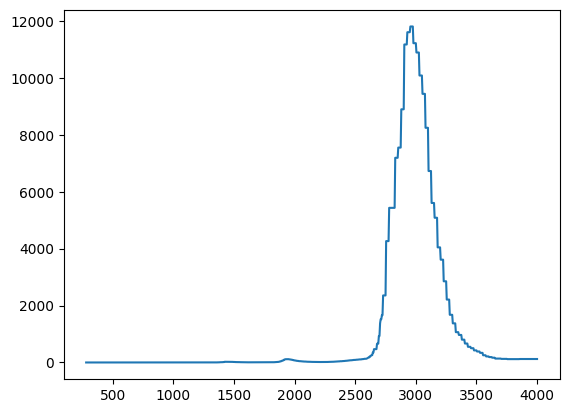

In [25]:
am15["extinction"] = regressor.predict(am15["wavelenght"].values.reshape(-1,1))
plt.plot(am15["wavelenght"],am15["extinction"])

In [26]:

def specAtDepth (x) :
    #x in cm
    return customSpect["trasmitted"]* np.exp(-am15["extinction"]*x)

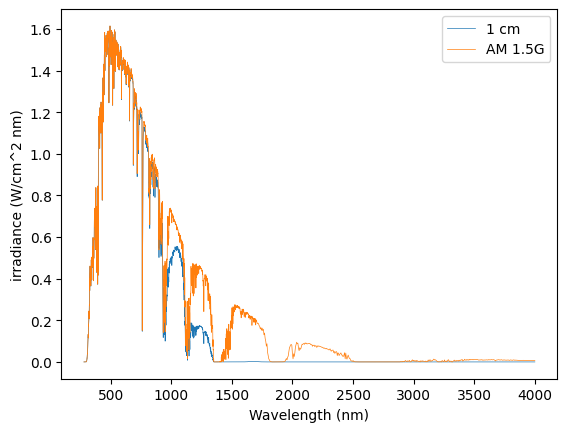

In [27]:
specAtDepth(50)
plt.plot(customSpect["wavelenght"], specAtDepth(1),linewidth = '0.5' , label = "1 cm" )
plt.plot(customSpect["wavelenght"], customSpect["trasmitted"],linewidth = '0.5',label = "AM 1.5G")
plt.xlabel('Wavelength (nm)')
plt.ylabel('irradiance (W/cm^2 nm)')
#plt.axis('equal')
leg = plt.legend();
plt.show()

In [28]:
# blackbody radiation for saturatipn cureent
E = sp.symbols("E")
V = sp.symbols("V")
fg = 2
Tc = 298 #kelvins
Q,K,T,H,C = sp.symbols("q k T h c")
ec = sp.exp((E-Q*V)/(K*T))
expr = (fg*Q*(E**2)*2*(sp.pi))/((H**3)*(C**2)*(ec-1))
#intr = sp.integrate(expr,(E,0.4*10**-19,sp.oo))
#intr.doit()
expr
ans = (expr.evalf(subs={Q:e ,K:Boltzmann , T:Tc, C:c , H:h, V:0}))
ansJmpp = (expr.evalf(subs={Q:e ,K:Boltzmann , T:Tc, C:c , H:h}))
print(ans)
func  =sp.lambdify (E, ans)


7.70035528768074e+64*E**2/(exp(2.43052701880534e+20*E) - 1.0)


In [29]:
def boltz(a):
    result = quad(func,a*e,(a/4)*10*e)
    return result[0]
vectBoltz  = np.vectorize(boltz)

In [30]:
def sqlimit(wave, irra):
    Tc = 298
    vt = Boltzmann*Tc/e
    figure,axis = plt.subplots(2,2)
    spectralData = pds.DataFrame()
    spectralData["wavelength"] = wave
    spectralData["irradiance"] = irra
    #axis[0,0].plot(spectralData["wavelength"] ,spectralData["irradiance"])
    spectralData["irradiance"] = spectralData["irradiance"]*(10**9)
    spectralData["wavelength"] = spectralData["wavelength"]*(10**-9)
    integral = cumulative_trapezoid(spectralData["irradiance"],spectralData["wavelength"],initial=0)
    maxwatt = integral[-1]
    print(maxwatt)
    spectralData["photon flux"] = e*spectralData["wavelength"]*spectralData["irradiance"]/(h*c)
    spectralData["energy"] =  h*c/(spectralData["wavelength"]*e)
    band_jv = pds.DataFrame()
    band_jv["band gap"] = np.linspace(0.4, 4.3, num=1000)

    band_jv["jr (0)"] = pds.Series(vectBoltz(band_jv["band gap"]))
    band_jv["j max"] = np.arange(1000)
    for i in range(1000):
        ini  = band_jv["band gap"][i]
        pos = spectralData[spectralData["energy"].lt(ini)].index[0]
        tempA = spectralData["photon flux"][:pos]
        tempB  = spectralData["wavelength"][:pos]
        #print(tempA.shape , tempB.shape)
        integral = cumulative_trapezoid(tempA,tempB,initial=0)
        
        band_jv["j max"][i] = integral[-1]

    band_jv["Voc"] = (Boltzmann*Tc/e)*np.log((band_jv["j max"]/band_jv["jr (0)"])+1)
    band_jv["Vmpp"] = np.arange(1000)
    for i in range(1000):
        volta = np.linspace(0.005,band_jv["Voc"][i],num=1000)
        power = volta*(band_jv["j max"][i]-band_jv["jr (0)"][i]*np.exp(volta/vt))
        band_jv["Vmpp"][i]= volta[np.argmax(power)]
    for i in range (1000):
        a = band_jv["band gap"][i]
        temp1 = ansJmpp.evalf(subs={V:band_jv["Vmpp"][i]})
        func1 = sp.lambdify (E,temp1)
        result = quad(func1,a*e,(a/4)*10*e)    
        band_jv["jmpp"] = band_jv["j max"] -result[0]
    band_jv["jsc"] = band_jv["j max"] - band_jv["jr (0)"]
    band_jv["FF"] = (band_jv["jmpp"]*band_jv["Vmpp"])/(band_jv["Voc"]*band_jv["jsc"])
    band_jv["efficiency"] = (band_jv["jmpp"]*band_jv["Vmpp"])/maxwatt
    band_jv["efficiencyg"] = (band_jv["jmpp"]*band_jv["Vmpp"])/1000.37
    #axis[1,0].plot(band_jv["band gap"],band_jv["efficiency"])
    #axis[1,1].plot(band_jv["band gap"],band_jv["efficiencyg"])
    #plt.show()
    return band_jv


980.3340814125435


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


630.7921342251226


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


574.6975308552543


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


538.6950044928656


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


511.71713431004537


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


490.21213790903494


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


472.4553824168516


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


457.42548575909194


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


444.4537579242433


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


433.07688370131774


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


422.9616174373496


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


413.8615329940541


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


405.59037533868485


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


398.00484056590705


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


390.9930338790481


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


384.4664945117311


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


378.35453975250715


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


372.60016268296084


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


367.1569992049766


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


361.98704891029195


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

357.05893886773976


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


352.3465857729564


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


347.82815511968


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


343.4852448764875


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


339.3022408259781


C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["j max"][i] = integral[-1]
C:\Users\Aditya Singh\AppData\Local\Temp\ipykernel_7464\2223473379.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  band_jv["Vmpp"][i]= volta[np.argmax(power)]


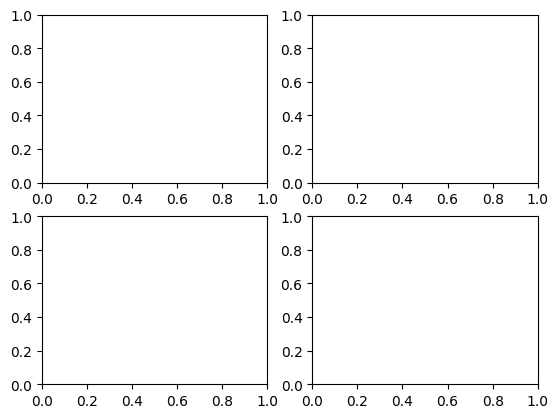

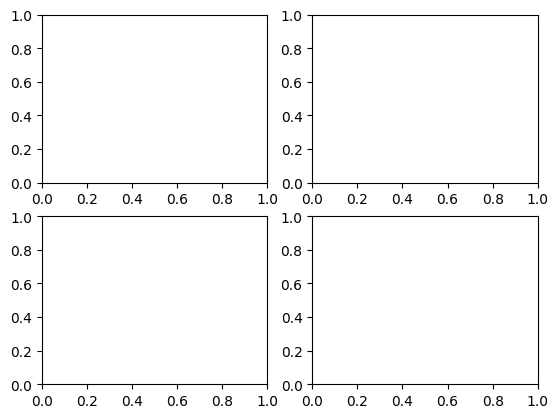

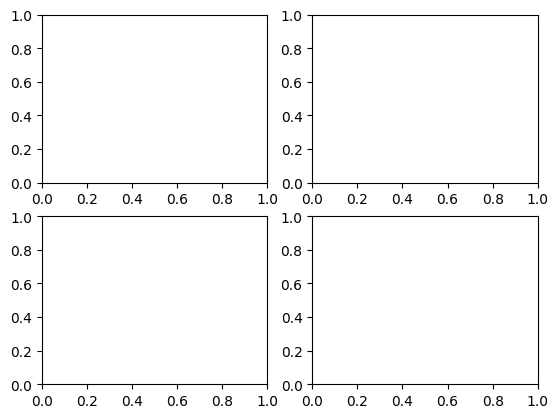

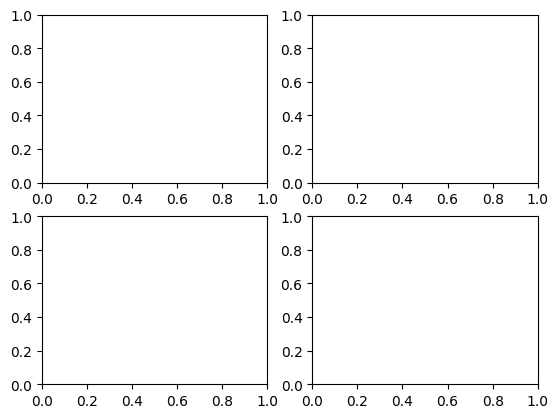

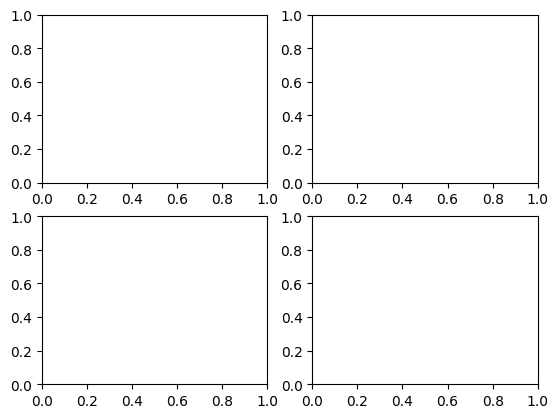

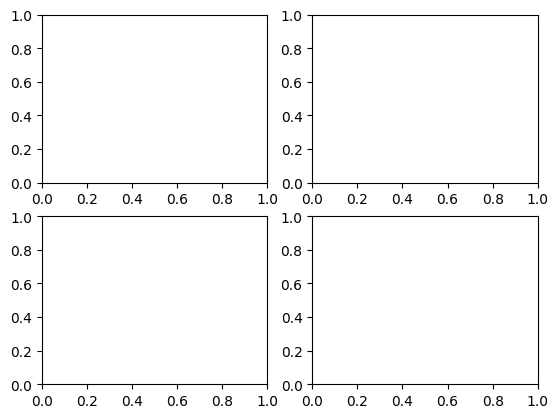

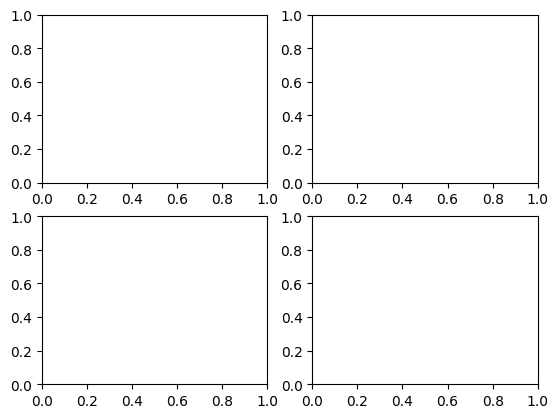

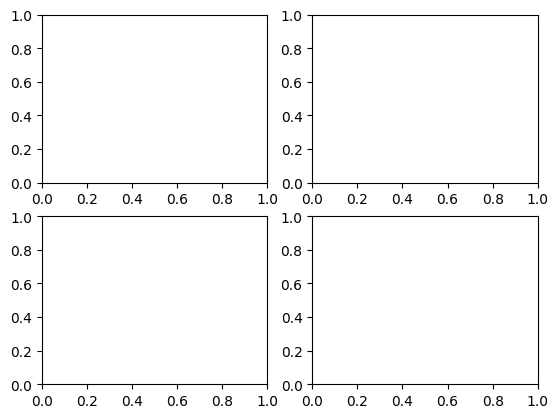

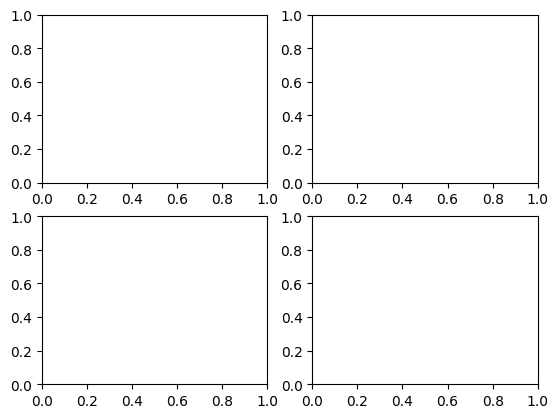

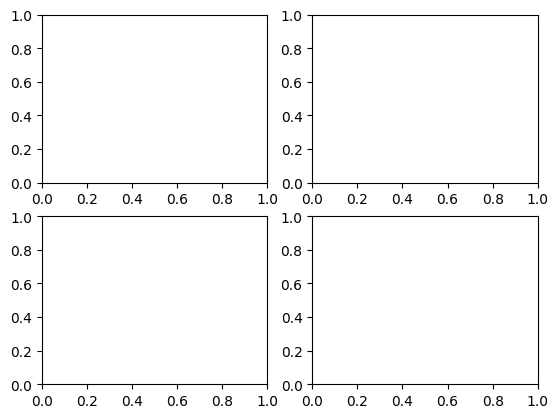

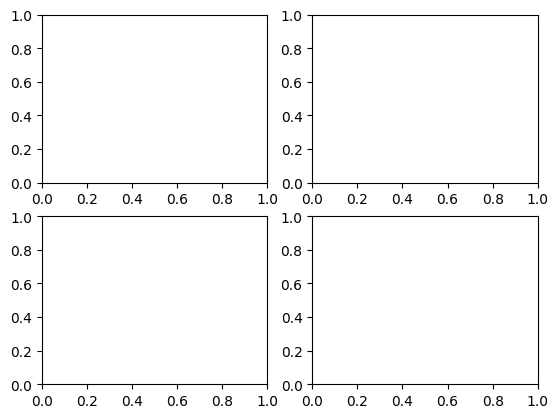

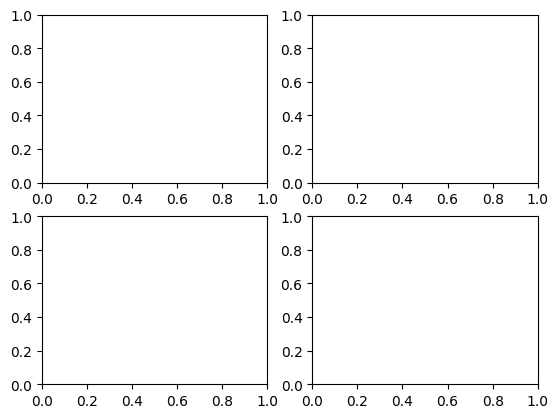

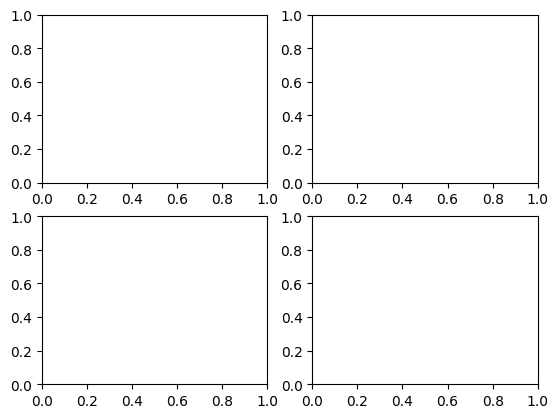

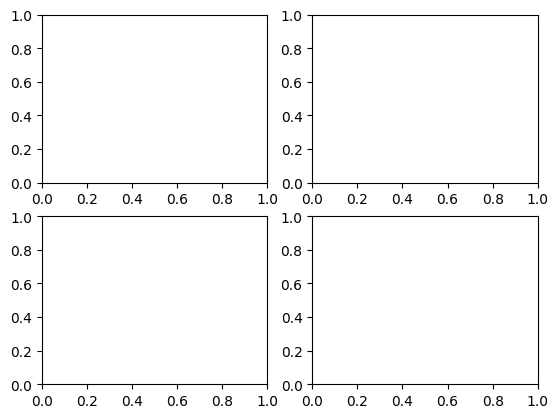

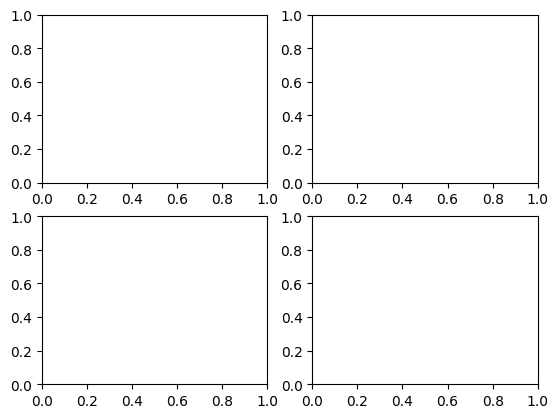

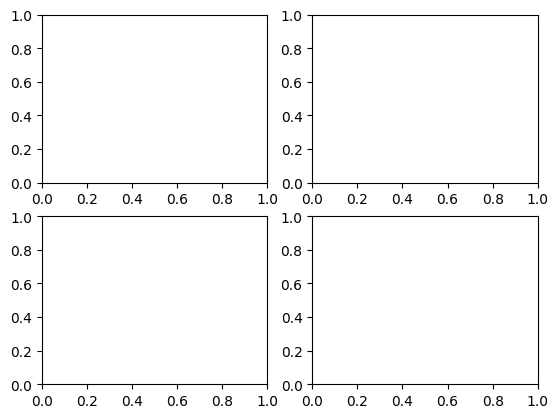

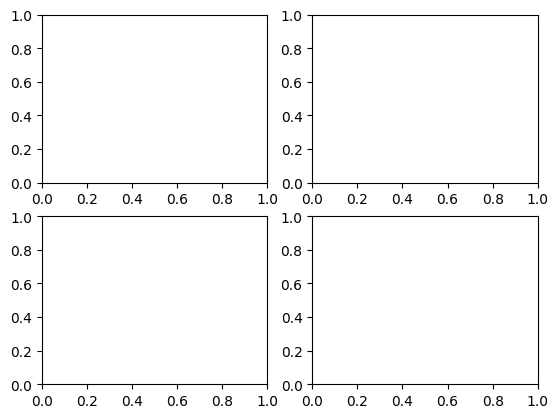

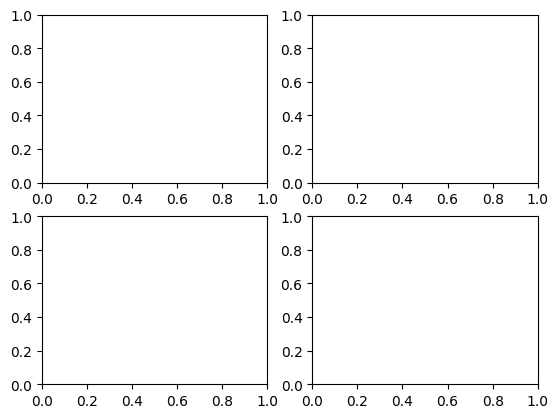

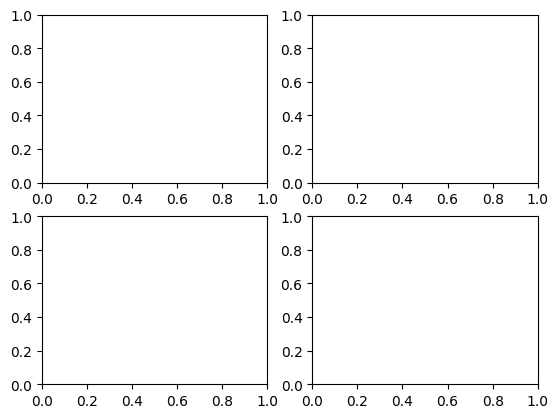

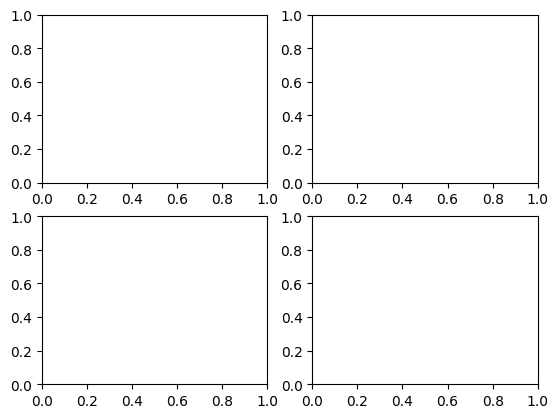

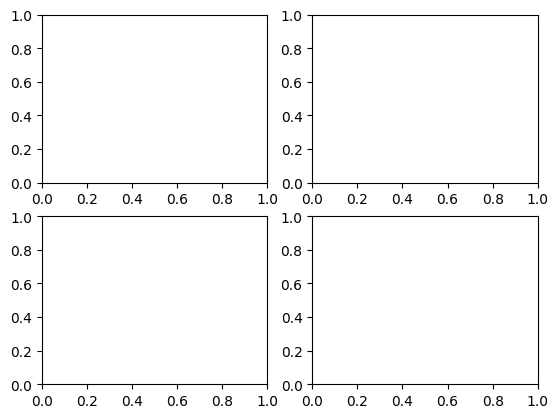

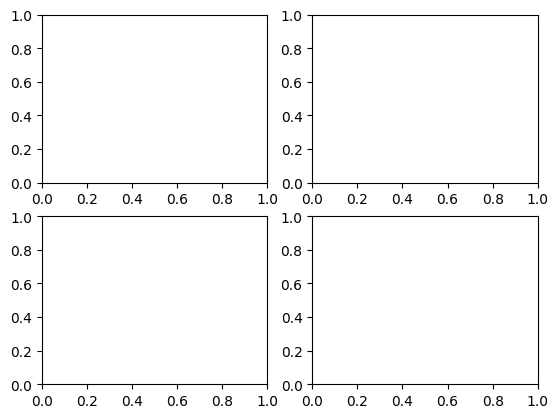

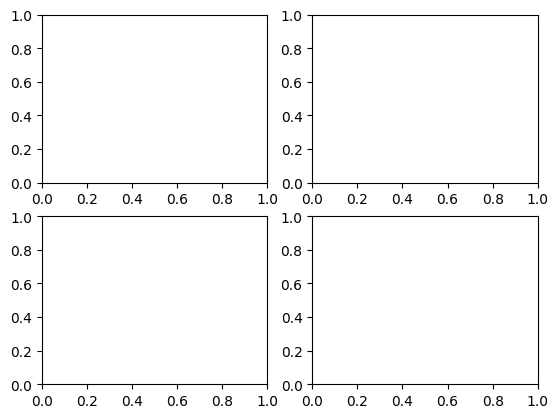

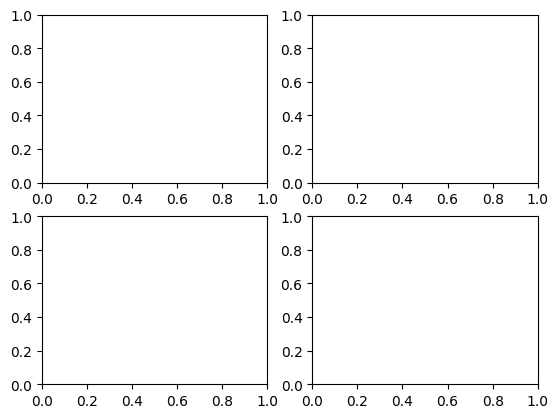

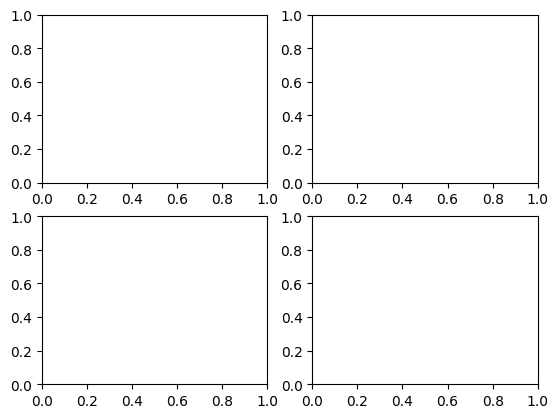

In [31]:
data = []
for p in range (0,250 , 10):
    data.append(sqlimit(am15["wavelenght"], specAtDepth(p)))


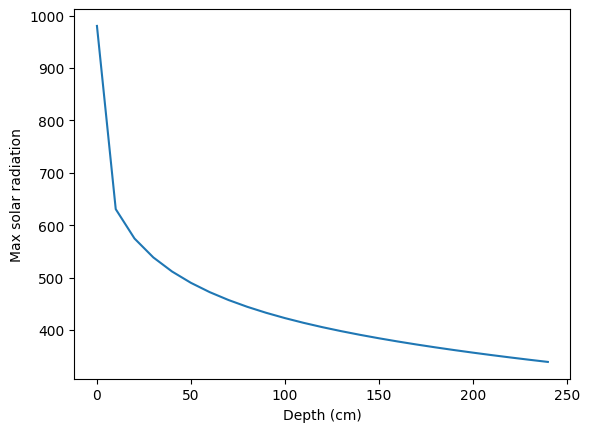

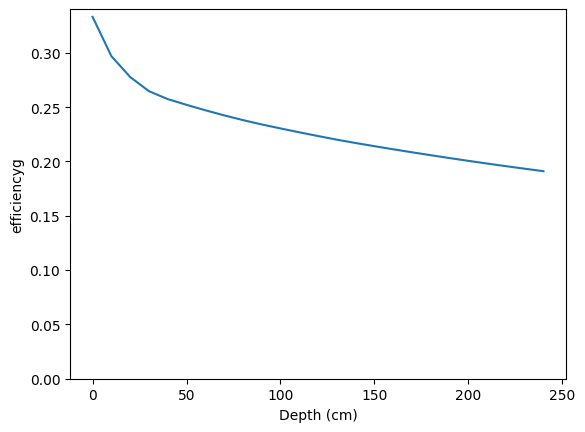

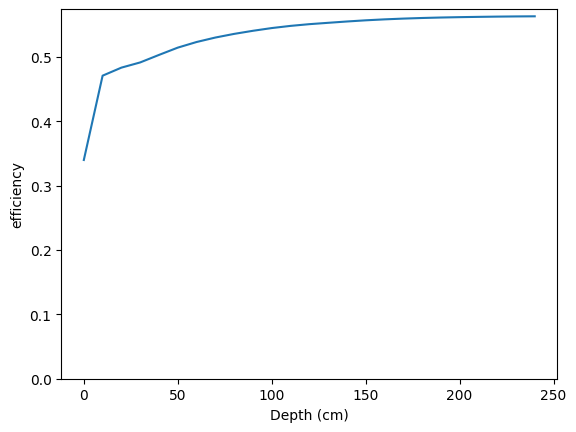

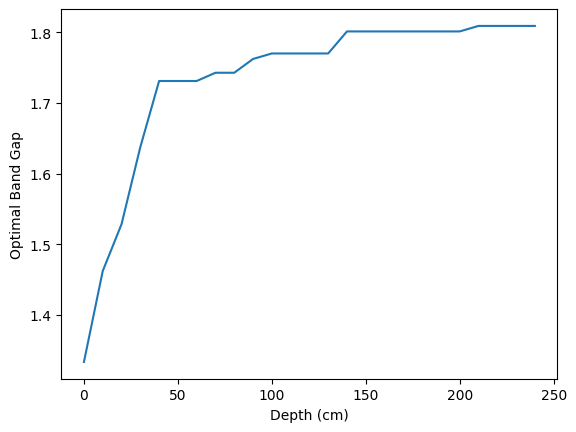

In [32]:

maxenergy = []
bandgap =[]
for i  in range (0,250,10):
    maxenergy.append( cumulative_trapezoid(specAtDepth(i),am15["wavelenght"],initial=0)[-1])
def extract (a):
    
    output = []
    for i in data:
        output.append(i[a].max())
    plt.plot(range(0,250,10),output)
    plt.ylim(bottom =0)
    plt.xlabel('Depth (cm)')
    plt.ylabel(a)
    plt.show()


c = plt
c.plot(range(0,250,10),maxenergy)
c.xlabel('Depth (cm)')
c.ylabel('Max solar radiation')
c.show()
extract("efficiencyg")
extract("efficiency")
for i in data :
     bandgap.append( i["band gap"][i["efficiencyg"].argmax()])


c.plot(range(0,250,10),bandgap)
c.xlabel('Depth (cm)')
c.ylabel('Optimal Band Gap')
c.show()

In [76]:
def jvcurve(wave, irra , eg, depth):
    Tc = 298
    print(eg)

    vt = Boltzmann*Tc/e
    #figure,axis = plt.subplots(2,2)
    spectralData = pds.DataFrame()
    spectralData["wavelength"] = wave
    spectralData["irradiance"] = irra
    #axis[0,0].plot(spectralData["wavelength"] ,spectralData["irradiance"])
    spectralData["irradiance"] = spectralData["irradiance"]*(10**9)
    spectralData["wavelength"] = spectralData["wavelength"]*(10**-9)
    integral = cumulative_trapezoid(spectralData["irradiance"],spectralData["wavelength"],initial=0)
    maxwatt = integral[-1]
    print(maxwatt)
    spectralData["photon flux"] = e*spectralData["wavelength"]*spectralData["irradiance"]/(h*c)
    spectralData["energy"] =  h*c/(spectralData["wavelength"]*e)
    #band_jv = pds.DataFrame()
    #band_jv["band gap"] = np.linspace(0.4, 4.3, num=1000)

    jr0 = boltz(eg)
    jmax = 0
    
    ini  =eg
    print(ini)
    pos = spectralData[spectralData["energy"].lt(ini)].index[0]
    tempA = spectralData["photon flux"][:pos]
    tempB  = spectralData["wavelength"][:pos]
    #print(tempA.shape , tempB.shape)
    integral = cumulative_trapezoid(tempA,tempB,initial=0)
        
    jmax = integral[-1]

    Voc = (Boltzmann*Tc/e)*np.log((jmax/jr0)+1)
    #band_jv["Vmpp"] = np.arange(1000)
    
    volta = np.linspace(0.005,Voc,num=1000)
    power = volta*(jmax-jr0*np.exp(volta/vt))
    j = []
    Vmpp= volta[np.argmax(power)]
    for i in range (1000):
        a = volta[i]
        temp1 = ansJmpp.evalf(subs={V:a})
        func1 = sp.lambdify (E,temp1)
        result = quad(func1,eg*e,(eg/4)*10*e)    
        j.append(jmax -result[0])
    plt.plot(volta, j , label = depth)
    plt.ylim(bottom = 0)
    p
    return (volta,j)
    


1.14
1000.3706555734415
1.14
1.14
682.0244481565819
1.14
1.14
630.7921342251226
1.14
1.14
598.7283695965709
1.14
1.14
422.9616174373496
1.14


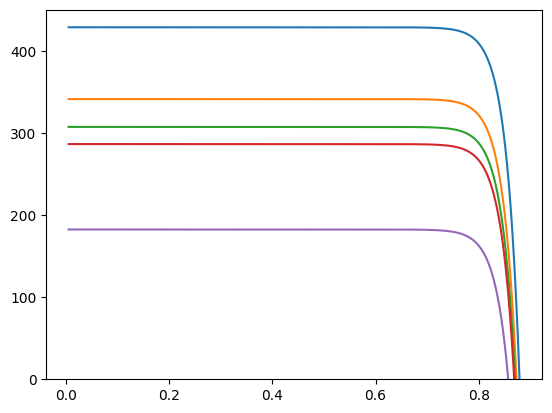

In [77]:
resultjv = []
resultjv.append(jvcurve(am15["wavelenght"], am15["Global tilt  W*m-2*nm-1"] , 1.14, "AM1.5G"))
resultjv.append(jvcurve(am15["wavelenght"],  specAtDepth(5), 1.14 , 5))
resultjv.append(jvcurve(am15["wavelenght"],  specAtDepth(10), 1.14, 10 ))
resultjv.append(jvcurve(am15["wavelenght"],  specAtDepth(15), 1.14, 15 ))
resultjv.append(jvcurve(am15["wavelenght"],  specAtDepth(100), 1.14 ,100 ))

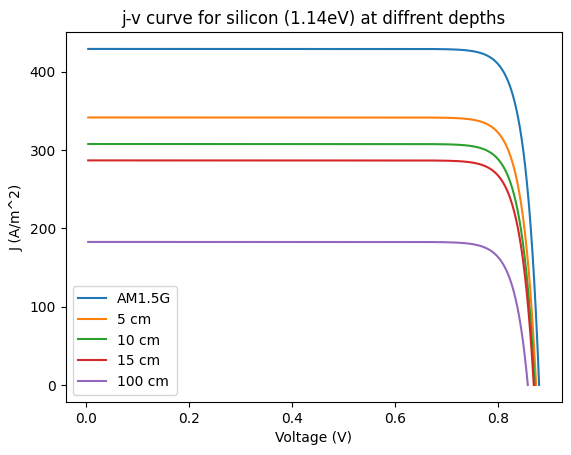

In [83]:
plt.plot (resultjv[0][0], resultjv[0][1], label ="AM1.5G")
plt.plot (resultjv[1][0], resultjv[1][1], label ="5 cm")
plt.plot (resultjv[2][0], resultjv[2][1], label ="10 cm")
plt.plot (resultjv[3][0], resultjv[3][1], label ="15 cm")
plt.plot (resultjv[4][0], resultjv[4][1], label ="100 cm")
plt.xlabel("Voltage (V)")
plt.ylabel("J (A/m^2)")
plt.title("j-v curve for silicon (1.14eV) at diffrent depths")
leg = plt.legend();